# PIN-SLAM running on the KITTI-Odometry benchmark dataset
The aim of this notebook is to serve as a reproducible entry point for the experiments outlined in the paper.

This notebook is inspired by [KISS-ICP](https://nbviewer.org/github/nachovizzo/kiss-icp/blob/main/evaluation/kitti.ipynb).

Please download the dataset from [here](https://www.cvlibs.net/datasets/kitti/eval_odometry.php).

Note: the results are slightly different using different random seeds and different hardwares.

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Device used: GeForce RTX 2080 Ti
Now evaluate sequence 00


100%|██████████| 4541/4541 [20:36<00:00,  3.67it/s]


Odometry evaluation:

Average Translation Error       (%): 0.541

Average Rotational Error (deg/100m): 0.221

Absoulte Trajectory Error       (m): 5.711

SLAM evaluation:

Average Translation Error       (%): 0.592

Average Rotational Error (deg/100m): 0.157

Absoulte Trajectory Error       (m): 0.810

# Loop corrected:  32

Now evaluate sequence 01


100%|██████████| 1101/1101 [06:19<00:00,  2.90it/s]


Odometry evaluation:

Average Translation Error       (%): 0.517

Average Rotational Error (deg/100m): 0.184

Absoulte Trajectory Error       (m): 6.043

SLAM evaluation:

Average Translation Error       (%): 0.517

Average Rotational Error (deg/100m): 0.184

Absoulte Trajectory Error       (m): 6.043

No loop found

Now evaluate sequence 02


100%|██████████| 4661/4661 [26:29<00:00,  2.93it/s]


Odometry evaluation:

Average Translation Error       (%): 0.514

Average Rotational Error (deg/100m): 0.165

Absoulte Trajectory Error       (m): 9.086

SLAM evaluation:

Average Translation Error       (%): 0.547

Average Rotational Error (deg/100m): 0.105

Absoulte Trajectory Error       (m): 1.857

# Loop corrected:  13

Now evaluate sequence 03


100%|██████████| 801/801 [03:18<00:00,  4.03it/s]


Odometry evaluation:

Average Translation Error       (%): 0.837

Average Rotational Error (deg/100m): 0.241

Absoulte Trajectory Error       (m): 0.672

SLAM evaluation:

Average Translation Error       (%): 0.837

Average Rotational Error (deg/100m): 0.241

Absoulte Trajectory Error       (m): 0.672

No loop found

Now evaluate sequence 04


100%|██████████| 271/271 [01:11<00:00,  3.79it/s]


Odometry evaluation:

Average Translation Error       (%): 0.194

Average Rotational Error (deg/100m): 0.180

Absoulte Trajectory Error       (m): 0.124

SLAM evaluation:

Average Translation Error       (%): 0.194

Average Rotational Error (deg/100m): 0.180

Absoulte Trajectory Error       (m): 0.124

No loop found

Now evaluate sequence 05


100%|██████████| 2761/2761 [11:28<00:00,  4.01it/s]


Odometry evaluation:

Average Translation Error       (%): 0.354

Average Rotational Error (deg/100m): 0.188

Absoulte Trajectory Error       (m): 2.014

SLAM evaluation:

Average Translation Error       (%): 0.335

Average Rotational Error (deg/100m): 0.091

Absoulte Trajectory Error       (m): 0.359

# Loop corrected:  19

Now evaluate sequence 06


100%|██████████| 1101/1101 [04:20<00:00,  4.23it/s]


Odometry evaluation:

Average Translation Error       (%): 0.339

Average Rotational Error (deg/100m): 0.080

Absoulte Trajectory Error       (m): 0.506

SLAM evaluation:

Average Translation Error       (%): 0.369

Average Rotational Error (deg/100m): 0.074

Absoulte Trajectory Error       (m): 0.409

# Loop corrected:  13

Now evaluate sequence 07


100%|██████████| 1101/1101 [04:22<00:00,  4.20it/s]


Odometry evaluation:

Average Translation Error       (%): 0.341

Average Rotational Error (deg/100m): 0.176

Absoulte Trajectory Error       (m): 0.426

SLAM evaluation:

Average Translation Error       (%): 0.385

Average Rotational Error (deg/100m): 0.139

Absoulte Trajectory Error       (m): 0.287

# Loop corrected:  1

Now evaluate sequence 08


100%|██████████| 4071/4071 [18:39<00:00,  3.64it/s]


Odometry evaluation:

Average Translation Error       (%): 0.829

Average Rotational Error (deg/100m): 0.206

Absoulte Trajectory Error       (m): 3.227

SLAM evaluation:

Average Translation Error       (%): 0.837

Average Rotational Error (deg/100m): 0.171

Absoulte Trajectory Error       (m): 2.801

# Loop corrected:  5

Now evaluate sequence 09


100%|██████████| 1591/1591 [06:54<00:00,  3.84it/s]


Odometry evaluation:

Average Translation Error       (%): 0.490

Average Rotational Error (deg/100m): 0.142

Absoulte Trajectory Error       (m): 1.729

SLAM evaluation:

Average Translation Error       (%): 0.598

Average Rotational Error (deg/100m): 0.093

Absoulte Trajectory Error       (m): 1.102

# Loop corrected:  1

Now evaluate sequence 10


100%|██████████| 1201/1201 [05:36<00:00,  3.57it/s]


Odometry evaluation:

Average Translation Error       (%): 0.552

Average Rotational Error (deg/100m): 0.184

Absoulte Trajectory Error       (m): 0.649

SLAM evaluation:

Average Translation Error       (%): 0.552

Average Rotational Error (deg/100m): 0.184

Absoulte Trajectory Error       (m): 0.649

No loop found

# Experiment Results (KITTI dataset) 
|Metric|Value|
|-:|:-|
Odometry ATE [%]|0.50|
Odometry ARE [deg/100m]|0.18|
SLAM RMSE [m]|1.37|


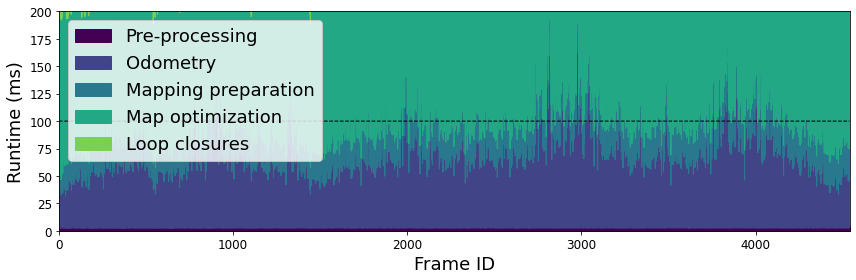

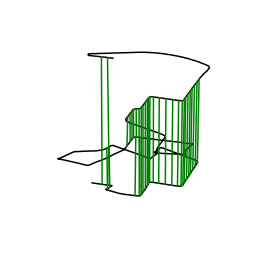

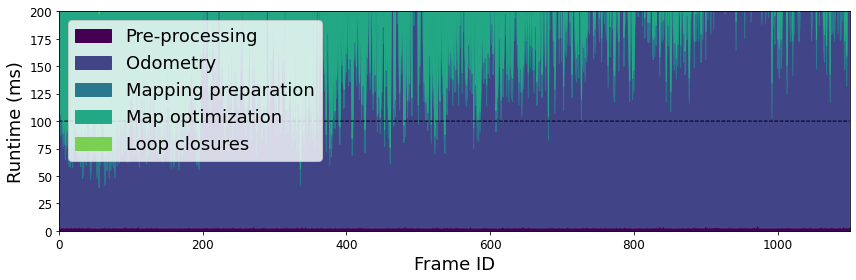

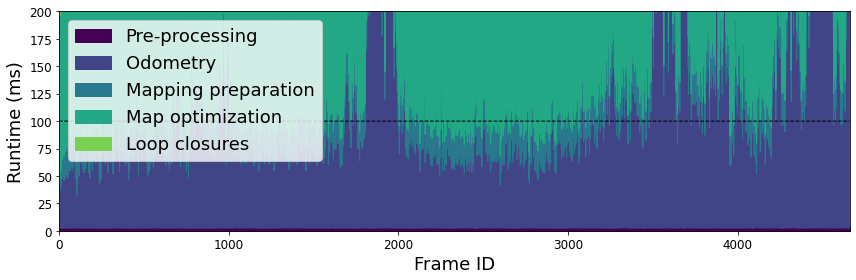

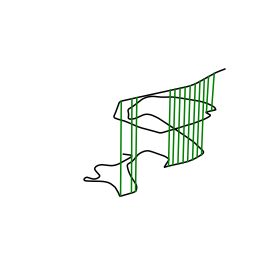

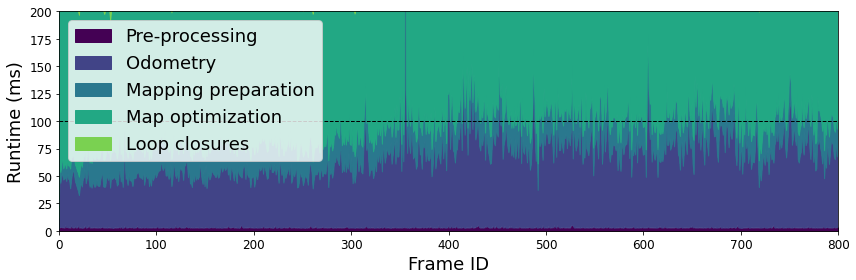

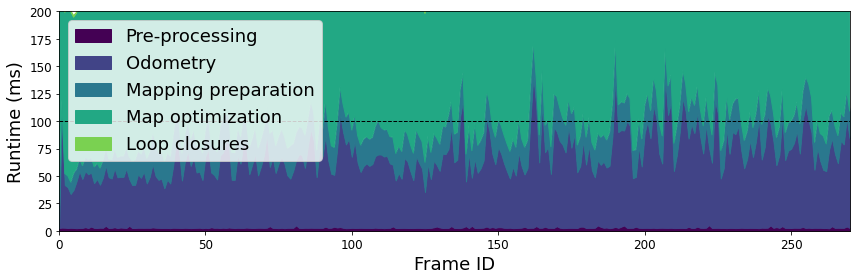

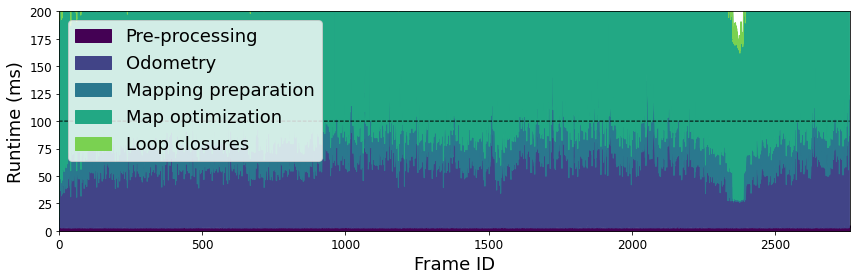

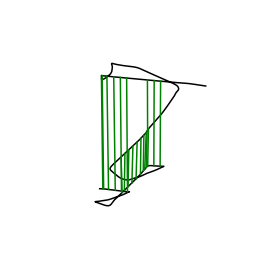

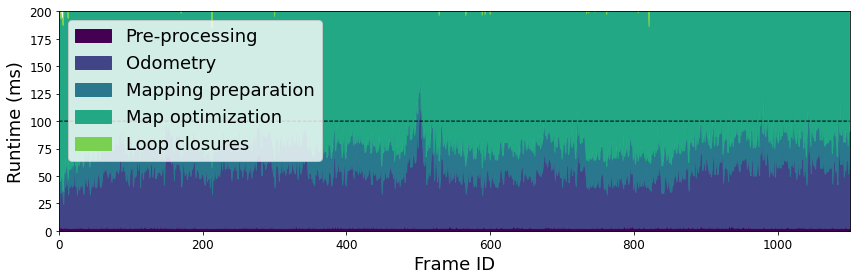

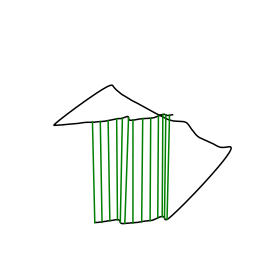

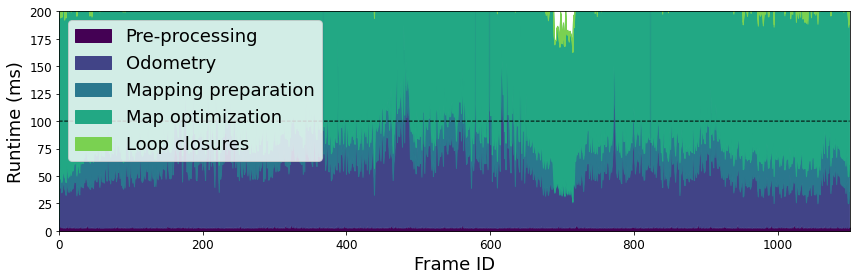

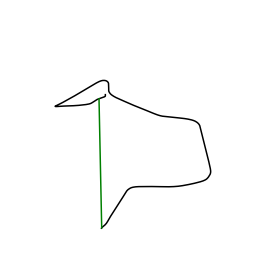

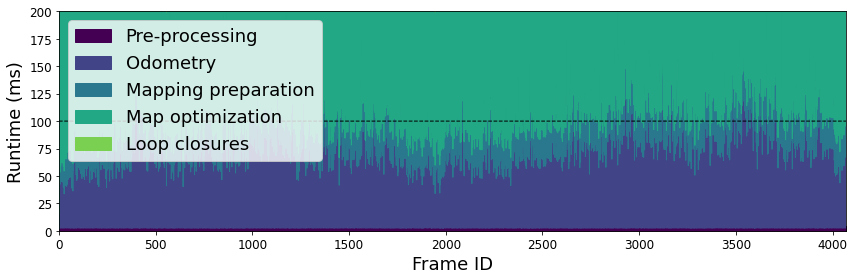

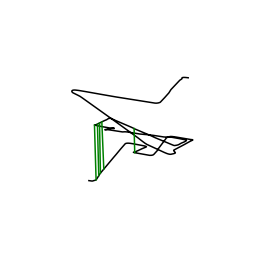

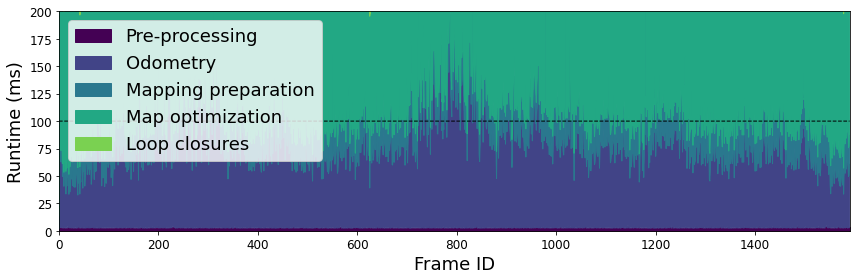

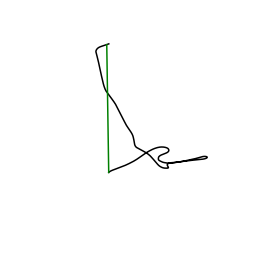

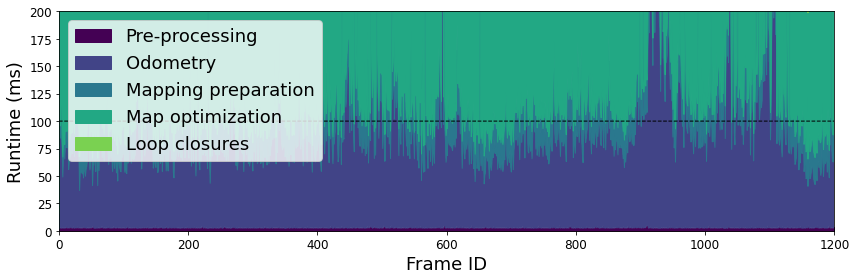

In [2]:
import pin_slam
import torch
from eval.eval_traj_utils import get_metrics, mean_metrics
from IPython.display import display_markdown

print('Device used:', torch.cuda.get_device_name(0))

metrics_dicts = []
for seq in range(11):
    seq_str = f'{seq:02d}'
    print('Now evaluate sequence '+ seq_str)
    seq_results = pin_slam.run_pin_slam('./config/lidar_slam/run_kitti.yaml', 'kitti', seq_str, seed=53115)
    metrics_dict = get_metrics(seq_results)
    metrics_dicts.append(metrics_dict)

metric_mean = mean_metrics(metrics_dicts)
table_results = f"# Experiment Results (KITTI dataset) \n|Metric|Value|\n|-:|:-|\n"
for metric, result in metric_mean.items():
    table_results += f"{metric}|{result:.2f}|\n"
display_markdown(table_results, raw=True)